In [1]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from fonctions2 import *

### Partie II: inpainting

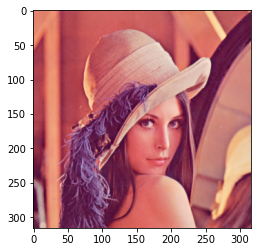

In [2]:
data=read_im("Lenna.jpg")
plt.imshow(data)

#### Test des fonctions

In [3]:
note_matrice,data_noise=noise(data,0.1)

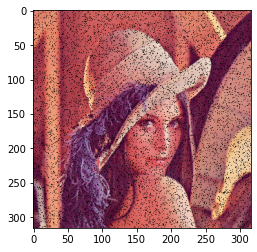

In [4]:
#noise(img,prc)
plt.imshow(data_noise)

In [5]:
#delete_rect(img,i,j,height,width)
note_matrice,data_rect=delete_rect(data,50,50,50,100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


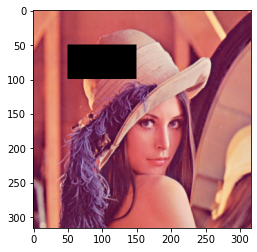

In [6]:
plt.imshow(data_rect)

In [7]:
#get_patch(i,j,h,img)
patch=get_patch(50,50,3,data)
patch.shape

(3, 3, 3)

In [8]:
patch

array([[[0.66666667, 0.24705882, 0.31764706],
        [0.67058824, 0.24705882, 0.29803922],
        [0.6627451 , 0.24313725, 0.32156863]],

       [[0.6627451 , 0.25098039, 0.30980392],
        [0.67843137, 0.25490196, 0.30588235],
        [0.68235294, 0.28627451, 0.34117647]],

       [[0.66666667, 0.23921569, 0.31372549],
        [0.6745098 , 0.25098039, 0.30980392],
        [0.66666667, 0.28235294, 0.33333333]]])

en lisant le premiere ressource, on conclure les points importants suivants:  
each signal corresponds to a patch  
for the consistence of the repired image, we directly sampled from all the patches in the source region(with non-corrupted components). We construct a dictionnary with size N*M, N is the nomber of critere, M is the nombre of patches got from source region. Each column corresponds to a patch  
Si une combinaison lineaire esr performante pour approximer source region, elle sera capable de generaliser aux valeurs manquantes

In [9]:
#patch_pixel_maquant retourne: patches avec pixels maquants
patch_maquant=patch_pixel_maquant(data_rect,note_matrice,3)
#dictionnaire retourne: patches sans pixels maquants
patch_complet=dictionnaire(data_rect,note_matrice,3)

In [10]:
print(patch_maquant.shape)
print(patch_complet.shape)

(5304, 1, 27)
(93292, 27)


In [11]:
patch_complet[0,:].shape

(27,)

In [12]:
patch_complet[0,:].reshape(1,-1).shape

(1, 27)

In [13]:
lasso=linear_model.Lasso()

In [14]:
lasso.fit(patch_complet.T,patch_complet[0,:])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
coef=dictionnaire_patch(patch_complet,patch,0.1)